<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(1_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.053631,37.098219,33.230984,14.200342,163.583175,152.824752,10.758423
1,0.0,1.0,47.372503,59.710436,23.492986,-36.335957,104.239969,147.998276,-43.758307
2,0.0,2.0,45.784642,81.005723,59.066473,3.991580,199.848418,193.045279,6.803139
3,0.0,3.0,46.556544,47.235357,81.982452,-46.647514,139.126839,180.242618,-41.115779
4,0.0,4.0,64.503373,31.117262,31.255596,28.437030,165.313261,142.079042,23.234219
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.130985,98.131128,68.902877,-58.556071,147.608920,190.905656,-43.296737
19996,999.0,16.0,45.288932,64.980346,63.120347,-30.670351,152.719274,176.917501,-24.198228
19997,999.0,17.0,62.606657,25.422351,93.384537,12.528130,203.941676,199.842202,4.099473
19998,999.0,18.0,99.754055,89.265624,98.931361,33.333046,331.284085,330.020282,1.263803


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.053631,37.098219,33.230984,14.200342,163.583175,152.824752,10.758423
1,0.0,1.0,47.372503,59.710436,23.492986,-36.335957,104.239969,147.998276,-43.758307
2,0.0,2.0,45.784642,81.005723,59.066473,3.991580,199.848418,193.045279,6.803139
3,0.0,3.0,46.556544,47.235357,81.982452,-46.647514,139.126839,180.242618,-41.115779
4,0.0,4.0,64.503373,31.117262,31.255596,28.437030,165.313261,142.079042,23.234219
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.130985,98.131128,68.902877,-58.556071,147.608920,190.905656,-43.296737
19996,999.0,16.0,45.288932,64.980346,63.120347,-30.670351,152.719274,176.917501,-24.198228
19997,999.0,17.0,62.606657,25.422351,93.384537,12.528130,203.941676,199.842202,4.099473
19998,999.0,18.0,99.754055,89.265624,98.931361,33.333046,331.284085,330.020282,1.263803


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    69.053631  37.098219  33.230984  ...  163.583175  152.824752  10.758423
      1.0    47.372503  59.710436  23.492986  ...  104.239969  147.998276 -43.758307
      2.0    45.784642  81.005723  59.066473  ...  199.848418  193.045279   6.803139
      3.0    46.556544  47.235357  81.982452  ...  139.126839  180.242618 -41.115779
      4.0    64.503373  31.117262  31.255596  ...  165.313261  142.079042  23.234219
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   29.130985  98.131128  68.902877  ...  147.608920  190.905656 -43.296737
      16.0   45.288932  64.980346  63.120347  ...  152.719274  176.917501 -24.198228
      17.0   62.606657  25.422351  93.384537  ...  203.941676  199.842202   4.099473
      18.0   99.754055  89.265624  98.931361  ...  331.284085  330.020282   1.263803
      19.0   84.768336  80.822147  74.332229  ...  265.385923  269.155723  -3.769800

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    69.053631  37.098219  33.230984  ...  163.583175  152.824752  10.758423
      1.0    47.372503  59.710436  23.492986  ...  104.239969  147.998276 -43.758307
      2.0    45.784642  81.005723  59.066473  ...  199.848418  193.045279   6.803139
      3.0    46.556544  47.235357  81.982452  ...  139.126839  180.242618 -41.115779
      4.0    64.503373  31.117262  31.255596  ...  165.313261  142.079042  23.234219
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   29.130985  98.131128  68.902877  ...  147.608920  190.905656 -43.296737
      16.0   45.288932  64.980346  63.120347  ...  152.719274  176.917501 -24.198228
      17.0   62.606657  25.422351  93.384537  ...  203.941676  199.842202   4.099473
      18.0   99.754055  89.265624  98.931361  ...  331.284085  330.020282   1.263803
      19.0   84.768336  80.822147  74.332229  ...  265.385923  269.155723  -3.769800

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.053631,37.098219,33.230984,14.200342,163.583175,152.824752,10.758423
1,0.0,1.0,47.372503,59.710436,23.492986,-36.335957,104.239969,147.998276,-43.758307
2,0.0,2.0,45.784642,81.005723,59.066473,3.991580,199.848418,193.045279,6.803139
3,0.0,3.0,46.556544,47.235357,81.982452,-46.647514,139.126839,180.242618,-41.115779
4,0.0,4.0,64.503373,31.117262,31.255596,28.437030,165.313261,142.079042,23.234219
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,29.130985,98.131128,68.902877,-58.556071,147.608920,190.905656,-43.296737
19996,999.0,16.0,45.288932,64.980346,63.120347,-30.670351,152.719274,176.917501,-24.198228
19997,999.0,17.0,62.606657,25.422351,93.384537,12.528130,203.941676,199.842202,4.099473
19998,999.0,18.0,99.754055,89.265624,98.931361,33.333046,331.284085,330.020282,1.263803


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    69.053631  37.098219  33.230984  ...  163.583175  152.824752  10.758423
      1.0    47.372503  59.710436  23.492986  ...  104.239969  147.998276 -43.758307
      2.0    45.784642  81.005723  59.066473  ...  199.848418  193.045279   6.803139
      3.0    46.556544  47.235357  81.982452  ...  139.126839  180.242618 -41.115779
      4.0    64.503373  31.117262  31.255596  ...  165.313261  142.079042  23.234219
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   29.130985  98.131128  68.902877  ...  147.608920  190.905656 -43.296737
      16.0   45.288932  64.980346  63.120347  ...  152.719274  176.917501 -24.198228
      17.0   62.606657  25.422351  93.384537  ...  203.941676  199.842202   4.099473
      18.0   99.754055  89.265624  98.931361  ...  331.284085  330.020282   1.263803
      19.0   84.768336  80.822147  74.332229  ...  265.385923  269.155723  -3.769800

[20000 rows x 7 columns]

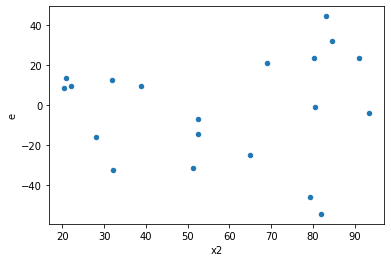

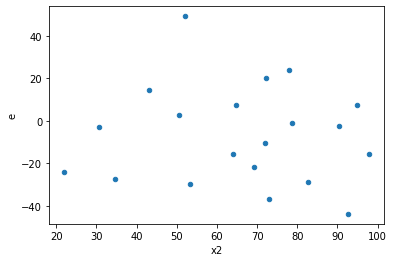

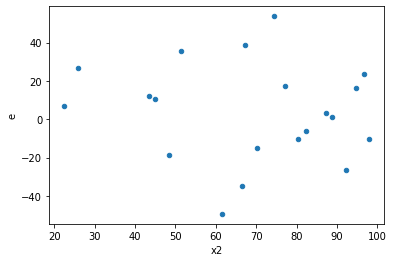

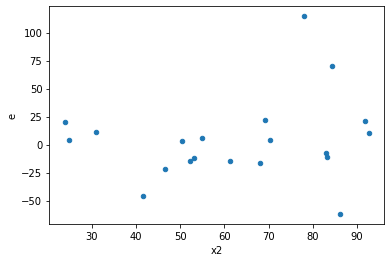

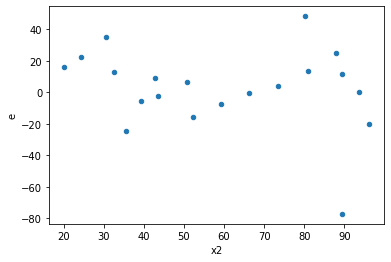

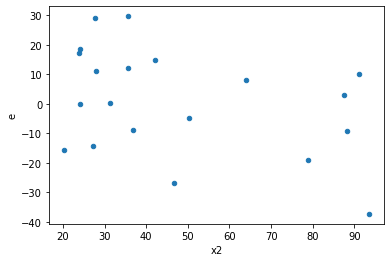

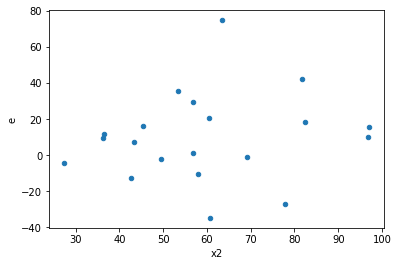

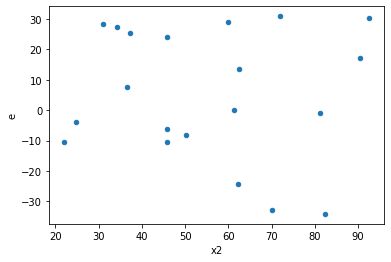

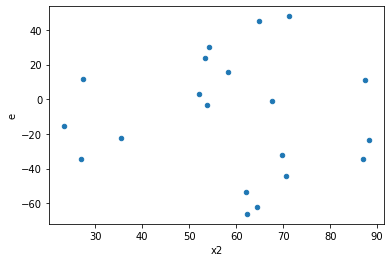

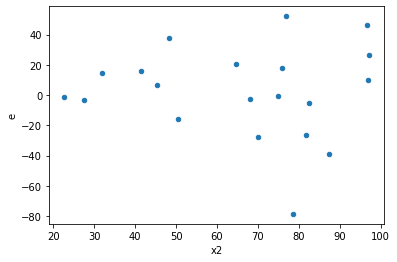

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,1575.1202060397964,3667.392927309939,315.02404120795927,733.4785854619878,2.328325745074773,0.3751145206016304,0.8124427396991848,0.1875572603008152,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,391.0794668226058,3302.3903854743985,78.21589336452116,660.4780770948797,8.444294997907337,0.035234599061803484,0.9823827004690983,0.017617299530901742,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,915.4621153011212,12944.312492384683,183.09242306022423,2588.8624984769367,14.13964846390933,0.01133159930228489,0.9943342003488576,0.005665799651142445,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,1197.0948284024712,4625.350647772875,239.41896568049424,925.070129554575,3.863813073142608,0.16426518245285338,0.9178674087735733,0.08213259122642669,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,952.9533336568161,3278.468531921996,190.59066673136323,655.6937063843992,3.4403243224317843,0.20126550299817203,0.899367248500914,0.10063275149908602,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,1817.632169158192,5278.990845153148,363.5264338316384,1055.7981690306297,2.904322961888395,0.26684516624407495,0.8665774168779625,0.13342258312203747,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,1418.5302769404655,2138.634583120956,283.7060553880931,427.7269166241912,1.5076411253862243,0.6633295217218627,0.6683352391390687,0.33166476086093133,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,373.57505589776247,4062.0643325755163,74.71501117955249,812.4128665151032,10.873489191653082,0.020380946663300703,0.9898095266683496,0.010190473331650352,Reject005=0 : Heteroscedasticity
9.0,5.0,5.0,2434.575523326777,4750.542718782229,486.9151046653554,950.1085437564458,1.951281721706768,0.4807756785736452,0.7596121607131774,0.2403878392868226,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,1575.1202060397964,3667.392927309939,315.02404120795927,733.4785854619878,2.328325745074773,0.3751145206016304,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,391.0794668226058,3302.3903854743985,78.21589336452116,660.4780770948797,8.444294997907337,0.035234599061803484,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,915.4621153011212,12944.312492384683,183.09242306022423,2588.8624984769367,14.13964846390933,0.01133159930228489,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,1197.0948284024712,4625.350647772875,239.41896568049424,925.070129554575,3.863813073142608,0.16426518245285338,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,1308.3232160634293,1069.8828024038564,261.66464321268586,213.9765604807713,0.8177511407486842,0.8306464713136025,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,952.9533336568161,3278.468531921996,190.59066673136323,655.6937063843992,3.4403243224317843,0.20126550299817203,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,1817.632169158192,5278.990845153148,363.5264338316384,1055.7981690306297,2.904322961888395,0.26684516624407495,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,1418.5302769404655,2138.634583120956,283.7060553880931,427.7269166241912,1.5076411253862243,0.6633295217218627,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,373.57505589776247,4062.0643325755163,74.71501117955249,812.4128665151032,10.873489191653082,0.020380946663300703,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      707
Reject005=0 : Heteroscedasticity    293
Name: Result_test, dtype: int64